# POSTTEST 6 KB
Nama : Rafly Genta Pratama

NIM : 2209106022

Kelas : Informatika A22 (A1)

## Mengimport Library


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score

## Membaca Dataset


In [2]:
df = pd.read_csv('FIFA 19 data.csv')
df

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,International Reputation,...,GKKicking,GKPositioning,GKReflexes,Release Clause,DOB,Height,Weight,Right Foot,Offensive Work Rate,Defensive Work Rate
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,5.0,...,15.0,14.0,8.0,226500000.0,1987-06-24,170,72,False,Medium,Medium
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,5.0,...,15.0,14.0,11.0,127100000.0,1985-02-05,187,83,True,High,Low
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,5.0,...,15.0,15.0,11.0,228100000.0,1992-02-05,175,68,True,High,Medium
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,1471,4.0,...,87.0,88.0,94.0,138600000.0,1990-11-07,193,76,True,Medium,Medium
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,4.0,...,5.0,10.0,13.0,196400000.0,1991-06-28,181,70,True,High,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17214,S. Griffin,18,Republic of Ireland,47,67,Waterford FC,60000.0,1000.0,1325,1.0,...,12.0,7.0,13.0,153000.0,1999-12-31,173,64,True,Medium,Medium
17215,K. Fujikawa,19,Japan,47,61,Júbilo Iwata,60000.0,1000.0,1333,1.0,...,6.0,11.0,8.0,113000.0,1998-07-24,171,66,True,Medium,Medium
17216,J. Young,18,Scotland,47,62,Swindon Town,60000.0,1000.0,1203,1.0,...,12.0,12.0,11.0,143000.0,1999-07-31,175,71,False,Medium,Medium
17217,J. Lundstram,19,England,47,65,Crewe Alexandra,60000.0,1000.0,1307,1.0,...,7.0,8.0,9.0,143000.0,1999-02-19,176,61,True,Medium,Medium


## Ngedrop Kolom 


In [3]:
# Menghapus kolom yanbg tidak terpakai
df = df.drop(['Defensive Work Rate', 'Offensive Work Rate', 'Right Foot', 'Weight', 'Height', 'DOB', 'Release Clause', 'GKReflexes', 'GKPositioning', 'GKKicking', 'GKHandling', 'GKDiving', 'SlidingTackle', 'StandingTackle', 'Marking', 'Composure', 'Penalties', 'Vision', 'Positioning', 'Interceptions', 'Aggression', 'LongShots', 'Strength', 'Stamina', 'Jumping', 'ShotPower', 'Balance', 'Reactions', 'Agility', 'SprintSpeed', 'Acceleration', 'BallControl', 'LongPassing', 'FKAccuracy', 'Curve', 'Dribbling', 'Volleys', 'ShortPassing', 'HeadingAccuracy', 'Finishing', 'Crossing', 'RB', 'RCB', 'CB', 'LCB', 'LB', 'RWB', 'RDM', 'CDM', 'LDM', 'LWB', 'RM', 'RCM', 'CM', 'LCM', 'LM', 'RAM', 'CAM', 'LAM', 'RW', 'RF', 'CF', 'LF', 'LW', 'RS', 'ST', 'LS', 'Jersey Number','Name'], axis=1)

In [4]:
# Menghapus kolom yang tidak ada nilainya
df = df.dropna()

## Encode kolom Kategorikal

In [5]:
le = LabelEncoder()
cat_cols = ['Nationality', 'Club', 'Body Type', 'Position']
for col in cat_cols:
  df[col] = le.fit_transform(df[col])

## Split Dataset

In [6]:
X = df.drop('Overall', axis=1)
y = df['Overall']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## StandardScaler

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Mendefinisikan Model


In [9]:
model = keras.Sequential([
  layers.Dense(64, activation='relu', input_shape=[X.shape[1]]), # Input layer
  layers.Dense(32, activation='relu'), # Hidden layer
  layers.Dense(1) # Output layer
])

## Mengcompile Model


In [10]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

## Train Model Menggunakan Callback


In [11]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/50
345/345 [==============================] - 3s 5ms/step - loss: 1515.7742 - mae: 30.5968 - val_loss: 103.6310 - val_mae: 7.7367
Epoch 2/50
345/345 [==============================] - 1s 4ms/step - loss: 77.6617 - mae: 6.7848 - val_loss: 57.7733 - val_mae: 5.9350
Epoch 3/50
345/345 [==============================] - 1s 4ms/step - loss: 51.3721 - mae: 5.5911 - val_loss: 42.1717 - val_mae: 5.1168
Epoch 4/50
345/345 [==============================] - 1s 4ms/step - loss: 37.7471 - mae: 4.7979 - val_loss: 30.9152 - val_mae: 4.3645
Epoch 5/50
345/345 [==============================] - 1s 4ms/step - loss: 27.7792 - mae: 4.1223 - val_loss: 22.3539 - val_mae: 3.7173
Epoch 6/50
345/345 [==============================] - 1s 4ms/step - loss: 19.7191 - mae: 3.4558 - val_loss: 15.1028 - val_mae: 3.0443
Epoch 7/50
345/345 [==============================] - 1s 4ms/step - loss: 12.9527 - mae: 2.7915 - val_loss: 9.5067 - val_mae: 2.3960
Epoch 8/50
345/345 [==============================] - 1s 4m

## Mengevaluasi model test set


In [12]:
test_loss, test_mae = model.evaluate(X_test, y_test)

108/108 [==============================] - 0s 3ms/step - loss: 1.2393 - mae: 0.7547


## Memprediksi target di test set


In [13]:
y_pred = model.predict(X_test)

108/108 [==============================] - 0s 3ms/step


## Menghitung R2_SCORE 


In [14]:
test_r2 = r2_score(y_test, y_pred)

print(f"Test loss: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test R2 score: {test_r2:.4f}")

Test loss: 1.2393
Test MAE: 0.7547
Test R2 score: 0.9733


## Plot Loss & MAE

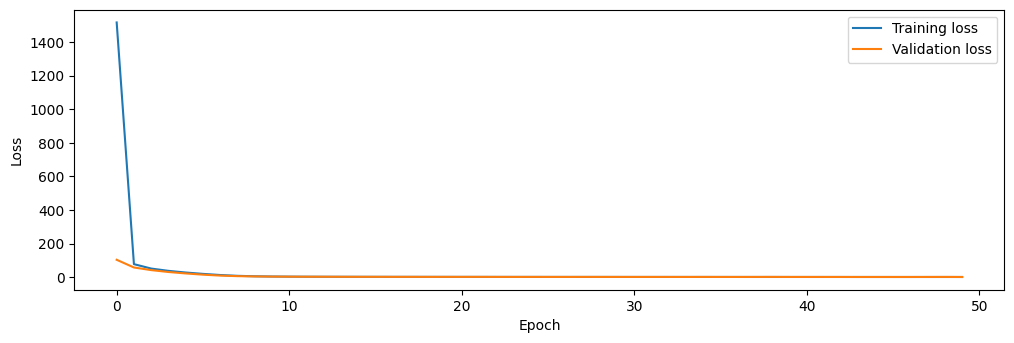

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

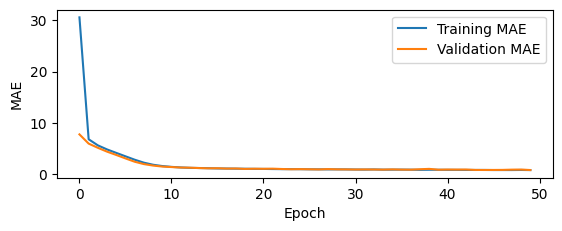

In [16]:
plt.subplot(2, 1, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()